# Seaborn | Part-3: Matplotlib v/s Seaborn Plotting Code

In this lecture we shall be comparing the lines of code we are required to write for a particular plot using Matplotlib and then Seaborn. This gets even more evident when trying to draw a statistical plot which is often the case in Data Science domain. And for this purpose today we shall take an example of a Linear Regression plot.

But before we get in action, let me highlight another important aspect related to aesthetics of a Seaborn plot. If you have installed Seaborn version 0.20 or above (which certainly will be the case if you have installed lately or updated Seaborn anytime after June, 2017), then the plots don't seem to automatically separate the value representations. Let me show what I mean by plotting one such figure:

In [1]:
# Importing required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

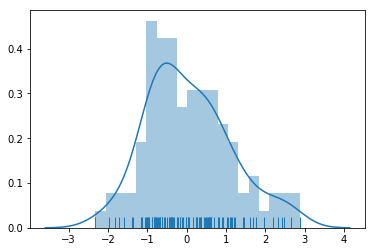

In [7]:
import warnings # Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
warnings.filterwarnings("ignore")

# Creating a randomly distributed dataset:
x = np.random.normal(size=100)
sns.distplot(x, bins=20, kde=True, rug=True)

The warning above is harmless as it just shows that a particular argument (`normed`) has been deprecated in current version of Seaborn. But the thing to observe in this histogram is that each bar is closely attached to another and though this might be the latest enhancement by Seaborn, many professional still like the old-Matplotlib style of bar separation. Here we shall try to draw separators between each bar:

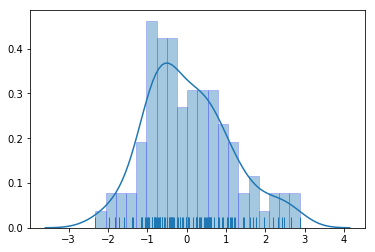

In [9]:
sns.distplot(x, bins=20, kde=True, rug=True, hist_kws=dict(edgecolor='b', linewidth=0.5))

Now we have each bar visibly separated and that gets more appealing to few professionals so if you want to, then now you know how to get this done. As far as the parameters are concerned, you don't really need to get bothered about that for now because I shall be covering these distribution plots in detail, in upcoming lectures.

Another important change that happened with version 0.20 was in terms of limits of axes. Sounds confusing, right? Let me show you an example of what I mean:

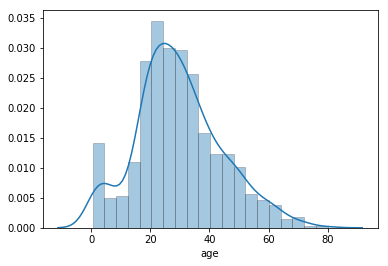

In [11]:
# Loading up built-in dataset:
titanic = sns.load_dataset("titanic")

# Creating a Distribution plot:
sns.distplot(titanic.age.dropna(), hist_kws=dict(edgecolor='k', linewidth=0.5))

You may notice in above plot that X-axis in particular doesn't start with 0 at extreme left bottom. Many a times we would let it be this way but for some reason if we strictly want the plot to begin with 0, then it requires an additional line of code:

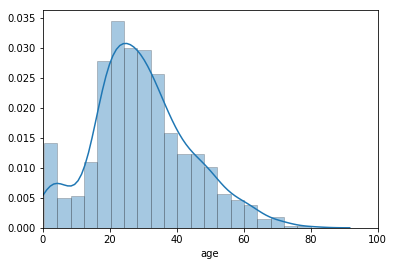

In [13]:
plt.xlim([0, 100])
sns.distplot(titanic.age.dropna(), hist_kws=dict(edgecolor='k', linewidth=0.5))

The list passed defines the *lower* and *upper* limits of our `X-axis`. If required, similarly we may set limits for our Y-axis as well by just adding another line of code: `plt.ylim([lower, upper])`. That pretty much covers the ledft overs for us in terms of aesthetics of our plot. I shall keep guiding you through the lectures with as much plot customization as I can but in a general professional atmosphere, this shall be good enough to begin with.

Now we shall look into our long awaited code length competition (Just kidding guys!). So, let us begin plotting our Matplotlib plot for Regression but before I begin, let me very clear on the point that we shall not delve into discussing Matplotlib code here because our sole agenda is only to observe the convenience we get with Seaborn. So here it is:

(0, 30)

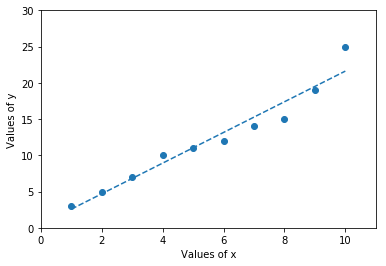

In [17]:
# Creating random datapoints:
x = [1,2,3,4,5,6,7,8,9,10]
y = [3,5,7,10,11,12,14,15,19,25] # Have tried to imbalance the fir

fit = np.polyfit(x,y,1)
# fit_fn is now a function which takes in x and returns an estimate for y
fit_fn = np.poly1d(fit)
plt.plot(x,y, 'yo', x, fit_fn(x), '--', color='C0')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.xlim(0, 11)
plt.ylim(0, 30)

Although it isn't a topic of our interest, still just for this example I shall illustrate how we could have mathematically computed factors like Slope, intercept, r-value (Correlation coefficient), p-value and Standard error of the estimate using [Scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html):

In [18]:
# stats model within SciPy is specifically for statistical plotting &
# linregress computes a LSR (least-squares Regression) for two sets of measurements:
from scipy.stats import linregress

linregress(x,y)

LinregressResult(slope=2.1151515151515152, intercept=0.4666666666666668, rvalue=0.9717076499418887, pvalue=2.7091468499697177e-06, stderr=0.18176766975113706)

[Linear Regression](http://data.library.virginia.edu/diagnostic-plots/) plots in general Linear attempts to model the relationship between two variables (*x* and *y* here) by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. 
For example, a Data Analyst might want to relate the weight of individuals to their height using a linear regression model. Or just a simple linear fit that we're trying to achieve with our example.

Let's now get this done in Seaborn:

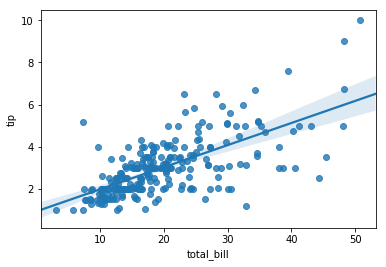

In [20]:
#Let us use one of our built-in dataset to achieve this:
tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips)

Both the plots on respective data points are correct but what differs is the control with a single line of code. Although I must agree that SciPy has enhanced a lot of features and things look good, but Seaborn always has that edge with it's visually appealing plots.

Let me also give you a quick preview with different color for this plot:

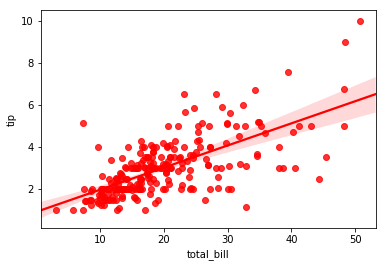

In [21]:
#Let us use one of our built-in dataset to achieve this:
tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips, color="r")

Before we move on to our next lecture, let me show a Seaborn plot against a Matplotlib plot which might be little complex at this stage but as you keep discussing more & more on our subject, at least the Seaborn segment of it will get clearer for you. Our sole agenda would be just to view the plot and not focus on the code associated. So let me present it without any further delay:

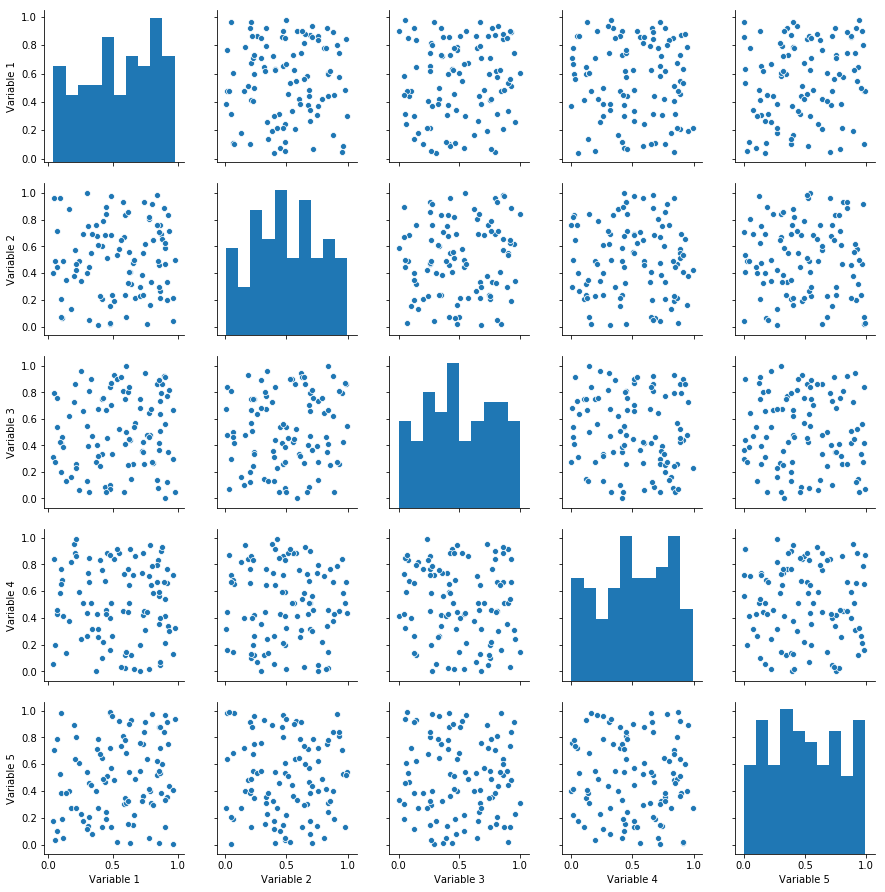

In [23]:
# Generate Data:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]
df = pd.DataFrame(data, columns=columns)

# Making a simple pairplot using Seaborn:
sns.pairplot(df)

Now let us try to do the same using Matplotlib and the difference in aesthetics should be a great morale booster for you to stay glued ahead for this statistical visualization bible with Python.

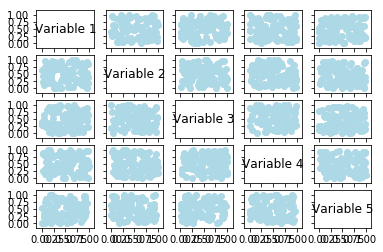

In [24]:
# Generatig Data:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]

# Making a pairplot:
fig, axes = plt.subplots(ncols=nvars, nrows=nvars, sharex='col', sharey='row')
for (i, j), ax in np.ndenumerate(axes):
    if i == j:
        ax.annotate(columns[i], (0.5, 0.5), xycoords='axes fraction',
                    ha='center', va='center', size='large')
    else:
        ax.scatter(data[:,i], data[:,j], color='lightblue')
    ax.locator_params(nbins=6, prune='both')

plt.show()

There is quite a bit of difference that we can observe in both the plots above but also let me tell you that there are immense opportunities of customization in *Matplotlib* code (which even you may try on your own) but that would require more lines of code or say parameters. Here, Seaborn gives us flexibility to achieve the same with minimum number of lines of code and this *statistical representation efficiency* is what we shall be observing throughout this course.

With this comparision been done, in our next lecture we shall be looking into Color options that are available with Seaborn and backed by Matplotlib. There multiple tips and tricks regarding colors that I would keep sharing in addition to next lecture, when we plot various types of Seaborn figures. Till then, **Happy Visualizing**!